# **1. Import Library**

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  
import seaborn as sns 
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

In [69]:
df = pd.read_csv("movies_clustering.csv")
df.head()

,country,gross,budget,votes,company,Cluster
0,United Kingdom,4.699877e+07,19000000.0,218850.0,Warner Bros.,0
1,United States,5.885311e+07,4500000.0,65000.0,Columbia Pictures,0
2,United States,1.745288e+08,18000000.0,218850.0,Lucasfilm,0
3,United States,8.345354e+07,3500000.0,218850.0,Paramount Pictures,0
4,United States,3.984634e+07,6000000.0,108000.0,Orion Pictures,0


In [70]:
df.tail()

,country,gross,budget,votes,company,Cluster
7663,United States,20205757.0,7000.0,18.0,Universal Pictures,0
7664,United States,20205757.0,20500000.0,36.0,Cactus Blue Entertainment,0
7665,United States,20205757.0,58750.0,29.0,Embi Productions,0
7666,United States,20205757.0,15000.0,29.0,Universal Pictures,0
7667,South Africa,20205757.0,20500000.0,7.0,PK 65 Films,0


# **3. Data Splitting**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7668 non-null   object 
 1   gross    7668 non-null   float64
 2   budget   7668 non-null   float64
 3   votes    7668 non-null   float64
 4   company  7668 non-null   object 
 5   Cluster  7668 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 359.6+ KB


In [72]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print('Kolom kategorikal:', categorical_features)
print('Jumlah kolom kategorikal:', len(categorical_features))
print('Kolom numerikal:', numerical_features)
print('Jumlah kolom numerikal:', len(numerical_features))


Kolom kategorikal: ['country', 'company']
Jumlah kolom kategorikal: 2
Kolom numerikal: ['gross', 'budget', 'votes', 'Cluster']
Jumlah kolom numerikal: 4


In [73]:
label_encoders = {}
df_lencoder = df.copy()

for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df_lencoder[col] = label_encoders[col].fit_transform(df[col])

df_lencoder.head()

,country,gross,budget,votes,company,Cluster
0,54,4.699877e+07,19000000.0,218850.0,2319,0
1,55,5.885311e+07,4500000.0,65000.0,731,0
2,55,1.745288e+08,18000000.0,218850.0,1540,0
3,55,8.345354e+07,3500000.0,218850.0,1812,0
4,55,3.984634e+07,6000000.0,108000.0,1777,0


In [74]:
scaler = MinMaxScaler()

numeric_columns = df_lencoder.select_dtypes(include=['int64', 'float64']).columns
df_lencoder[numeric_columns] = scaler.fit_transform(df_lencoder[numeric_columns])

X = df_lencoder.drop(columns=['Cluster'])
y = df_lencoder['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)


print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(6134, 5), y_train=(6134,)
Test set shape: X_test=(1534, 5), y_test=(1534,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [75]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
 
print("Training Model Finished.")

Training Model Finished.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

- KNN
- Decision Tree
- Random Forest
- Support Vector Machine
- Naive Bayes

## **b. Evaluasi Model Klasifikasi**

KNN Classification Report:
               precision    recall  f1-score   support

         0.0    1.00000   0.99767   0.99883      1287
         1.0    0.98800   1.00000   0.99396       247

    accuracy                        0.99804      1534
   macro avg    0.99400   0.99883   0.99640      1534
weighted avg    0.99807   0.99804   0.99805      1534



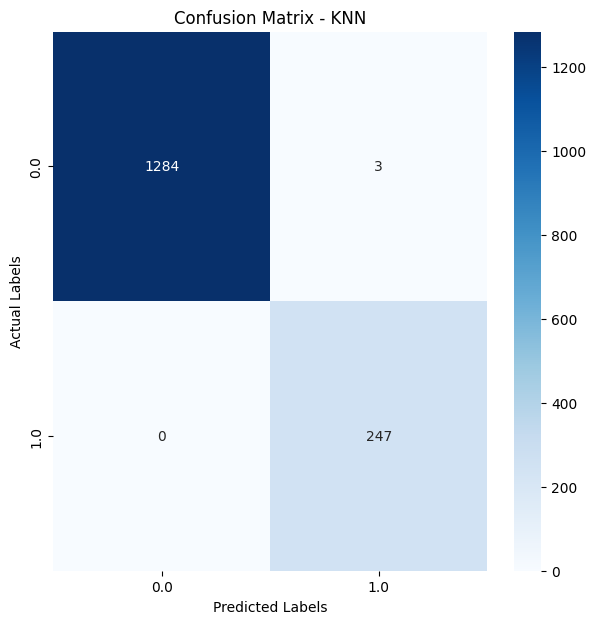

In [76]:
knn_pred = knn.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, knn_pred, digits=5))

knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - KNN')
plt.show()
print('\n')

Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000      1287
         1.0    1.00000   1.00000   1.00000       247

    accuracy                        1.00000      1534
   macro avg    1.00000   1.00000   1.00000      1534
weighted avg    1.00000   1.00000   1.00000      1534



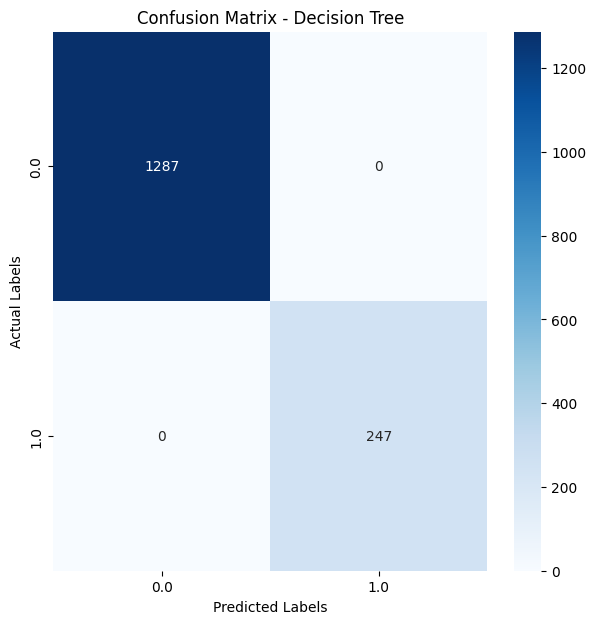

In [77]:
dt_pred = dt.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred, digits=5))

dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
print('\n')

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000      1287
         1.0    1.00000   1.00000   1.00000       247

    accuracy                        1.00000      1534
   macro avg    1.00000   1.00000   1.00000      1534
weighted avg    1.00000   1.00000   1.00000      1534



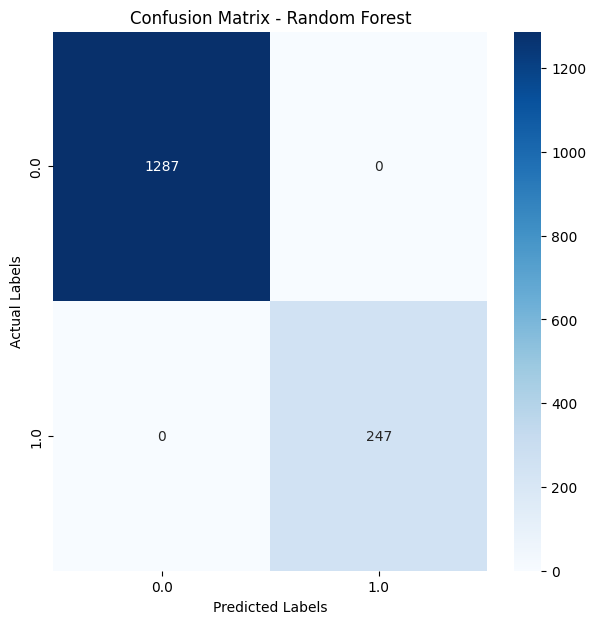

In [78]:
rf_pred = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred, digits=5))

rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()
print('\n')

SVM Classification Report:
               precision    recall  f1-score   support

         0.0    1.00000   0.99689   0.99844      1287
         1.0    0.98406   1.00000   0.99197       247

    accuracy                        0.99739      1534
   macro avg    0.99203   0.99845   0.99521      1534
weighted avg    0.99743   0.99739   0.99740      1534



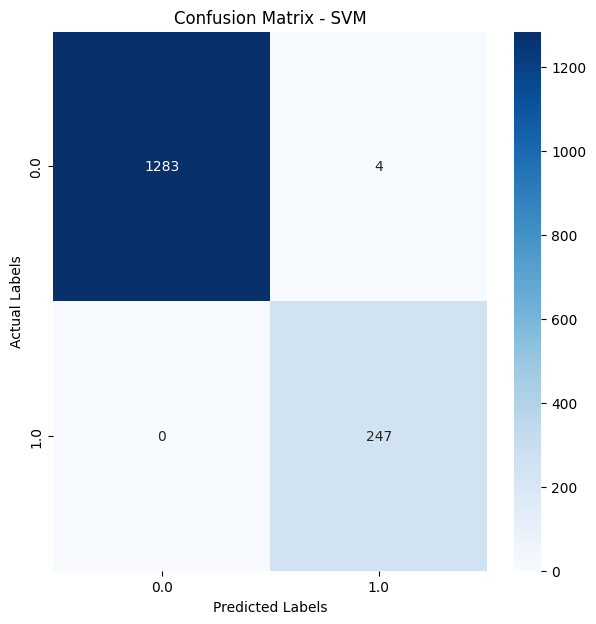

In [79]:
svm_pred = svm.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_pred, digits=5))

svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - SVM')
plt.show()
print('\n')

Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0    1.00000   0.99068   0.99532      1287
         1.0    0.95367   1.00000   0.97628       247

    accuracy                        0.99218      1534
   macro avg    0.97683   0.99534   0.98580      1534
weighted avg    0.99254   0.99218   0.99225      1534



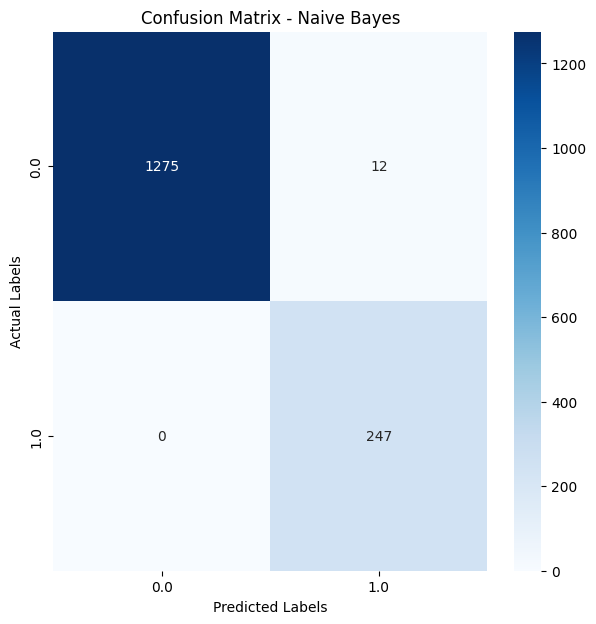

In [80]:
nb_pred = nb.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_pred, digits=5))

nb_cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()
print('\n')

In [81]:
knn_report = classification_report(y_test, knn_pred, digits=5, output_dict=True)
dt_report = classification_report(y_test, dt_pred, digits=5, output_dict=True)
rf_report = classification_report(y_test, rf_pred, digits=5, output_dict=True)
svm_report = classification_report(y_test, svm_pred, digits=5, output_dict=True)
nb_report = classification_report(y_test, nb_pred, digits=5, output_dict=True)

# Extract relevant metrics (accuracy, precision, recall, F1 score)
metrics = {
    'Model': ['K-Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes'],
    'Accuracy': [knn_report['accuracy'], dt_report['accuracy'], rf_report['accuracy'], svm_report['accuracy'], nb_report['accuracy']],
    'Precision': [knn_report['weighted avg']['precision'], dt_report['weighted avg']['precision'], rf_report['weighted avg']['precision'], svm_report['weighted avg']['precision'], nb_report['weighted avg']['precision']],
    'Recall': [knn_report['weighted avg']['recall'], dt_report['weighted avg']['recall'], rf_report['weighted avg']['recall'], svm_report['weighted avg']['recall'], nb_report['weighted avg']['recall']],
    'F1-Score': [knn_report['weighted avg']['f1-score'], dt_report['weighted avg']['f1-score'], rf_report['weighted avg']['f1-score'], svm_report['weighted avg']['f1-score'], nb_report['weighted avg']['f1-score']]
}

# Create a DataFrame
df_untuned = pd.DataFrame(metrics)

df_untuned

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbor,0.998044,0.998068,0.998044,0.998049
1,Decision Tree,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,Support Vector Machine,0.997392,0.997434,0.997392,0.997401
4,Naive Bayes,0.992177,0.992540,0.992177,0.992252


## **c. Tuning Model Klasifikasi (Optional)**

Untuk Desicison Tree dan Random Forest, tidak dilakukan tuning karena nilai akurasi yang sudah maksimal.

In [82]:
# KNN Hyperparameter Tuning
knn_param_dist = {
    'n_neighbors': np.arange(1, 30, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(10, 50, 5),
    'p': [1, 2]
}

knn_random_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=knn_param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=69,
    n_jobs=-1
)

knn_random_search.fit(X_train, y_train)
print(f"Best KNN parameters: {knn_random_search.best_params_}")
print(f"Best KNN score: {knn_random_search.best_score_:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END algorithm=kd_tree, leaf_size=45, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=45, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=45, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=15, n_neighbors=3, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=15, n_neighbors=3, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=15, n_neighbors=3, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=23, p=2, wei

In [83]:
# SVM Hyperparameter Tuning
svm_param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'degree': [2, 3, 4, 5],
    'class_weight': ['balanced', None]
}

svm_random_search = RandomizedSearchCV(
    estimator=SVC(random_state=69, probability=True),
    param_distributions=svm_param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=69,
    n_jobs=-1
)

svm_random_search.fit(X_train, y_train)
print(f"Best SVM parameters: {svm_random_search.best_params_}")
print(f"Best SVM score: {svm_random_search.best_score_:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END C=1000.0, class_weight=balanced, degree=3, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END C=1000.0, class_weight=balanced, degree=3, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END C=1000.0, class_weight=balanced, degree=3, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END C=1.0, class_weight=None, degree=2, gamma=1.0, kernel=rbf; total time=   0.1s
[CV] END C=1.0, class_weight=None, degree=2, gamma=1.0, kernel=rbf; total time=   0.1s
[CV] END C=10.0, class_weight=balanced, degree=2, gamma=1000.0, kernel=linear; total time=   0.0s
[CV] END C=1.0, class_weight=None, degree=2, gamma=1.0, kernel=rbf; total time=   0.1s
[CV] END C=10.0, class_weight=balanced, degree=2, gamma=1000.0, kernel=linear; total time=   0.0s
[CV] END C=10.0, class_weight=balanced, degree=2, gamma=1000.0, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=None, degree=5, gamma=10.0, kernel=rbf; total time=   0.5s
[CV] END C

In [84]:
# Naive Bayes Hyperparameter Tuning
nb_param_dist = {
    'var_smoothing': np.logspace(-10, -8, 30)
}

nb_random_search = RandomizedSearchCV(
    estimator=GaussianNB(),
    param_distributions=nb_param_dist,
    n_iter=30,
    cv=3,
    verbose=2,
    random_state=69,
    n_jobs=-1
)

nb_random_search.fit(X_train, y_train)
print(f"Best Naive Bayes parameters: {nb_random_search.best_params_}")
print(f"Best Naive Bayes score: {nb_random_search.best_score_:.4f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ...............var_smoothing=1.1721022975334794e-10; total time=   0.0s
[CV] END ................var_smoothing=1.373823795883261e-10; total time=   0.0s
[CV] END ...............var_smoothing=1.1721022975334794e-10; total time=   0.0s
[CV] END ................var_smoothing=1.373823795883261e-10; total time=   0.0s
[CV] END ...............var_smoothing=1.6102620275609427e-10; total time=   0.0s
[CV] END ...............var_smoothing=1.1721022975334794e-10; total time=   0.0s
[CV] END ...............var_smoothing=1.6102620275609427e-10; total time=   0.0s
[CV] END ...............var_smoothing=1.6102620275609427e-10; total time=   0.0s
[CV] END ................var_smoothing=1.3738237

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [85]:
# KNN
knn_best_model = knn_random_search.best_estimator_
knn_best_model_y_pred = knn_best_model.predict(X_test)
print("KNN (best model) Classification Report:\n", classification_report(y_test, knn_best_model_y_pred, digits=5))

# SVM
svm_best_model = svm_random_search.best_estimator_
svm_best_model_y_pred = svm_best_model.predict(X_test)
print("SVM (best model) Classification Report:\n", classification_report(y_test, svm_best_model_y_pred, digits=5))

# Naive Bayes
nb_best_model = nb_random_search.best_estimator_
nb_best_model_y_pred = nb_best_model.predict(X_test)
print("Naive Bayes (best model) Classification Report:\n", classification_report(y_test, nb_best_model_y_pred, digits=5))

KNN (best model) Classification Report:
               precision    recall  f1-score   support

         0.0    1.00000   0.99767   0.99883      1287
         1.0    0.98800   1.00000   0.99396       247

    accuracy                        0.99804      1534
   macro avg    0.99400   0.99883   0.99640      1534
weighted avg    0.99807   0.99804   0.99805      1534

SVM (best model) Classification Report:
               precision    recall  f1-score   support

         0.0    1.00000   0.99922   0.99961      1287
         1.0    0.99597   1.00000   0.99798       247

    accuracy                        0.99935      1534
   macro avg    0.99798   0.99961   0.99880      1534
weighted avg    0.99935   0.99935   0.99935      1534

Naive Bayes (best model) Classification Report:
               precision    recall  f1-score   support

         0.0    1.00000   0.99068   0.99532      1287
         1.0    0.95367   1.00000   0.97628       247

    accuracy                        0.99218      15

In [86]:
knn_best_report = classification_report(y_test, knn_best_model_y_pred, digits=5, output_dict=True)
svm_best_report = classification_report(y_test, svm_best_model_y_pred, digits=5, output_dict=True)
nb_best_report = classification_report(y_test, nb_best_model_y_pred, digits=5, output_dict=True)

metrics_tuned = {
    'Model': ['K-Nearest Neighbors (Tuned)','Support Vector Machine (Tuned)', 'Naive Bayes (Tuned)'],
    'Accuracy': [knn_best_report['accuracy'], svm_best_report['accuracy'], nb_best_report['accuracy']],
    'Precision': [knn_best_report['weighted avg']['precision'], svm_best_report['weighted avg']['precision'], nb_best_report['weighted avg']['precision']],
    'Recall': [knn_best_report['weighted avg']['recall'], svm_best_report['weighted avg']['recall'], nb_best_report['weighted avg']['recall']],
    'F1-Score': [knn_best_report['weighted avg']['f1-score'], svm_best_report['weighted avg']['f1-score'], nb_best_report['weighted avg']['f1-score']],
}

df_tuned = pd.DataFrame(metrics_tuned)

df_tuned

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (Tuned),0.998044,0.998068,0.998044,0.998049
1,Support Vector Machine (Tuned),0.999348,0.999351,0.999348,0.999349
2,Naive Bayes (Tuned),0.992177,0.992540,0.992177,0.992252


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [87]:
df_merged = pd.concat([df_untuned, df_tuned], ignore_index=True)
df_merged


,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbor,0.998044,0.998068,0.998044,0.998049
1,Decision Tree,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,Support Vector Machine,0.997392,0.997434,0.997392,0.997401
4,Naive Bayes,0.992177,0.992540,0.992177,0.992252
5,K-Nearest Neighbors (Tuned),0.998044,0.998068,0.998044,0.998049
6,Support Vector Machine (Tuned),0.999348,0.999351,0.999348,0.999349
7,Naive Bayes (Tuned),0.992177,0.992540,0.992177,0.992252


### Precision dan Recall
Semua model memiliki nilai precision dan recall yang sangat tinggi (di atas 0.97), dan bahkan untuk model Decision Tree dan Random Forest menghasilkan nilai yang maksima, selain itu tidak ada yang menunjukkan nilai rendah untuk kelas tertentu. Nilai precision dan recall yang hampir sama menunjukkan model dapat mengenali semua kelas dengan baik.

### Overfitting atau Underfitting
Dari data yang diberikan:

1. Tidak ada tanda-tanda underfitting - Semua model memiliki akurasi sangat tinggi (>0.97), menunjukkan model dapat memahami pola data dengan baik.
2. Kemungkinan overfitting pada model - Decision Tree dan Random Forest memiliki akurasi sempurna (1), untuk model ini, mungkin terjadi overfitting tapi harus di periksa kembali apakah benar memang terjadi overfitting atau tidak.
3. Tuning berhasil meningkatkan performa pada model SVM - dan untuk model K-Nearest Neighbor serta Naive Bayes tidak mengalami peningkatan.